In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
from sklearn.manifold import TSNE

In [4]:
prefix = r'...\large_files/'
input_files = [f for f in os.listdir(prefix) if f.startswith('enwiki') and f.endswith('txt')]
n_files=25
if n_files is not None:
        input_files = input_files[:n_files]


In [5]:
lines=[]
for file in input_files:
    for line in open(prefix + file, encoding='utf-8'):
            line = line.strip()
            if(line!=''):
                lines.append(line)


In [6]:
lines[0]

'[[Anarchism]]'

In [7]:
sentences=[]
sen=[]
for i in lines :
    x=i.split(".")
    for j in x:
        sentences.append(j)

In [8]:
len(sentences)

3372763

In [9]:
for x in sentences:
    x=x.lower()
    sen.append(x)

In [10]:
punctuations = '''!-;:'"\,<>./?@£#$%^&*_~'''
obrackets=['(','[','{']
cbrackets=[')','}',']']
sen2=[]
flag=0
for i in sen:
    j=[]
    for char in i:
        if char in obrackets:
            flag=1
        if (char not in punctuations and char!=chr(8364) and char!=',') and flag!=1 :
            j.append(char)
        if char in cbrackets:
            flag=0
            
    sen2.append("".join(j))

In [11]:
sentences=list(filter(lambda a: len(a) >2, sentences))

In [12]:
len(sentences)

2814720

In [13]:
k=0
vocab={}
wordcount=0
number_occurences={}
column_names=[]
for line in sentences:
    words=line.split(" ")
    for word in words:
        if word not in vocab:
            if len(word)>=2:
                vocab[word]=k
                wordcount+=1
                number_occurences[word]=0
                k=k+1
            else:
                if word=="a" or word=="i":
                    vocab[word]=k
                    wordcount+=1
                    k=k+1
                    number_occurences[word]=0
        if word in vocab:
            number_occurences[word]+=1

In [14]:
occurences=sorted(number_occurences.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

In [21]:
voacb={}
words=[]
k=0
worcount=0
for i in range(0,2000):
    vocab[occurences[i][0]]=k
    k+=1
    wordcount+=1
    words.append(occurences[i][0])
vocab['UNKNOWN']=2000
words.append("UNKNOWN")
wordcount+=1

In [22]:
sen=[]
for i in range(0,1000):
    sen.append(sentences[i])
    

In [23]:
len(words)

2001

In [24]:
A = np.zeros((len(words), len(sen)))
i=0
for x in sen:
    j=x.split(" ")
    for l in j:
        if l not in words:
            A[vocab["UNKNOWN"],i]+=1
        else:
            A[vocab[l],i]+=1
    i+=1

In [25]:
len(A)

2001

In [26]:
A=np.array(A)

In [27]:
transformer=TfidfTransformer(smooth_idf=True,norm=None)

In [28]:
tfidf=transformer.fit_transform(A).toarray()

In [29]:
print(type(tfidf))

<class 'numpy.ndarray'>


In [24]:
pd.DataFrame(tfidf)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.00000,0.000000,0.000000,0.000000,8.601002,15.625090,0.000000,0.000000,0.000000,0.000000,...,8.070374,14.939201,16.261998,16.026432,7.959149,0.0,0.000000,15.625090,15.004780,0.0
1,0.00000,0.000000,0.000000,0.000000,0.000000,7.812545,16.140748,7.907855,16.391075,8.264530,...,0.000000,14.939201,0.000000,32.052863,7.959149,0.0,0.000000,23.437635,22.507170,0.0
2,0.00000,0.000000,0.000000,0.000000,8.601002,0.000000,16.140748,7.907855,8.195537,0.000000,...,0.000000,7.469600,0.000000,0.000000,0.000000,0.0,8.505692,0.000000,0.000000,0.0
3,0.00000,0.000000,0.000000,0.000000,0.000000,7.812545,0.000000,0.000000,0.000000,0.000000,...,0.000000,14.939201,8.130999,0.000000,0.000000,0.0,0.000000,23.437635,7.502390,0.0
4,0.00000,0.000000,0.000000,0.000000,8.601002,7.812545,0.000000,0.000000,0.000000,8.264530,...,0.000000,14.939201,0.000000,0.000000,7.959149,0.0,0.000000,15.625090,15.004780,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
19997,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
19998,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
19999,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [30]:
len(column_names)

0

In [31]:
import umap

In [32]:
We=umap.UMAP(n_neighbors=2,min_dist=0.5).fit_transform(tfidf)

C:\Users\Om Shreenidhi\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [112]:
tsne=TSNE(n_components=3,perplexity=100,n_iter=10000)
W=tsne.fit_transform(tfidf)

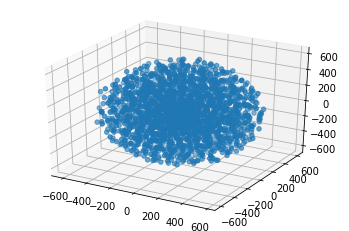

In [116]:
from mpl_toolkits import mplot3d
ax=plt.axes(projection='3d')
zdata=W[:,2]
ydata=W[:,1]
xdata=W[:,0]
ax.scatter3D(xdata,ydata,zdata)

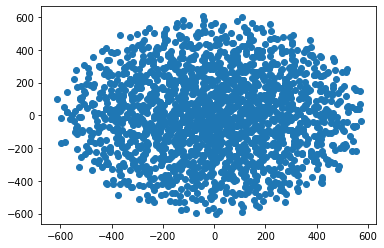

In [117]:
plt.scatter(W[:,0],W[:,1])

In [80]:
We.shape

(2001, 2)

In [38]:
from sklearn.metrics import pairwise_distances

In [121]:
def get_analogies(w1,w2,w3):
    G,D=W.shape
    word1=W[vocab[w1]]
    word2=W[vocab[w2]]
    word3=W[vocab[w3]]
    V0=word1+word2-word3
    distances=pairwise_distances(V0.reshape(1,D), W, metric='cosine').reshape(G)
    idx = distances.argsort()[:30]
    return idx

In [122]:
l=get_analogies('man', 'woman','her')

In [123]:
for i in l:
    print(words[i])

products
image
isbn
|ref=harv}}
pages
prominent
sequence
episode
woman
home
school
says
creation
Three
call
poet
movement
edition
stars
Portuguese
told
national
formal
latter
regions
amount
Paris
urban
Ancient
space
